# Boston House Price Prediction Using Linear Regression

In [21]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [22]:
boston=load_boston()
df=pd.DataFrame(boston.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [23]:
df.columns=boston.feature_names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [24]:
df['PRICE']=boston.target

In [25]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [26]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [27]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [28]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [29]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [30]:
corelation=df.corr()

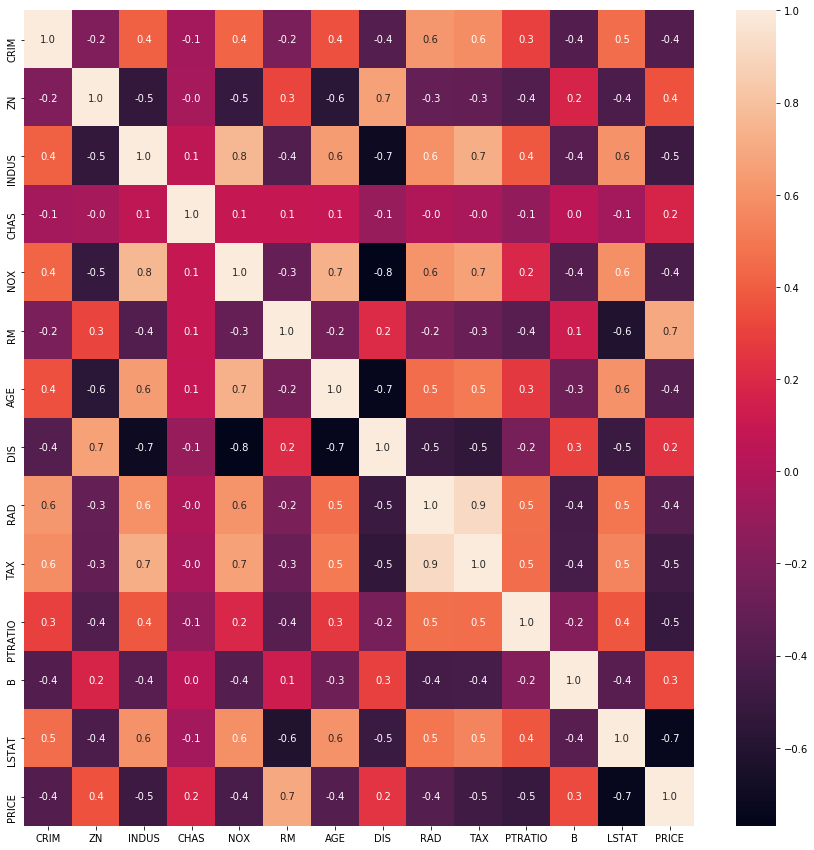

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(corelation,cbar=True,annot=True,fmt="0.1f")

In [32]:
x=df.drop('PRICE',axis=1)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [33]:
y=df.PRICE
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lm.intercept_

36.357041376595205

In [38]:
x_train.columns,lm.coef_

(Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT'],
       dtype='object'),
 array([-1.22569795e-01,  5.56776996e-02, -8.83428230e-03,  4.69344849e+00,
        -1.44357828e+01,  3.28008033e+00, -3.44778157e-03, -1.55214419e+00,
         3.26249618e-01, -1.40665500e-02, -8.03274915e-01,  9.35368715e-03,
        -5.23477529e-01]))

In [39]:
coeff=pd.DataFrame([x_train.columns,lm.coef_])
coeff=coeff.T
coeff.columns=['Attributes','co-efficients']
coeff

,Attributes,co-efficients
0,CRIM,-0.12257
1,ZN,0.0556777
2,INDUS,-0.00883428
3,CHAS,4.69345
4,NOX,-14.4358
5,RM,3.28008
6,AGE,-0.00344778
7,DIS,-1.55214
8,RAD,0.32625
9,TAX,-0.0140666


In [40]:
y_pred=lm.predict(x_train)
y_pred.shape

(354,)

In [42]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7465991966746854
Adjusted R^2: 0.736910342429894
MAE: 3.08986109497113
MSE: 19.07368870346903
RMSE: 4.367343437774162


Text(0, 0.5, 'Predicted_price')

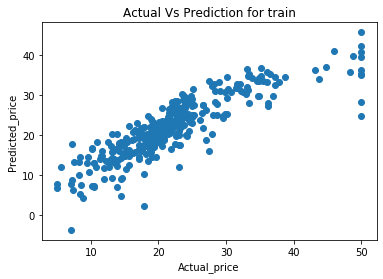

In [43]:
plt.scatter(y_train,y_pred)
plt.title('Actual Vs Prediction for train')
plt.xlabel('Actual_price')
plt.ylabel('Predicted_price')

Text(0.5, 0, 'Residuals')

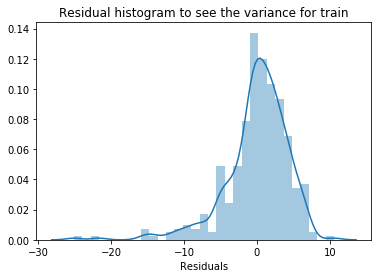

In [44]:
residuals=y_pred-y_train
sns.distplot(residuals)
plt.title('Residual histogram to see the variance for train')
plt.xlabel('Residuals')

In [45]:
y_test_pred=lm.predict(x_test)
y_test_pred.shape

(152,)

In [46]:
print('R^2:', metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7121818377409195
Adjusted R^2: 0.6850685326005713
MAE: 3.8590055923707407
MSE: 30.053993307124127
RMSE: 5.482152251362974


Text(0, 0.5, 'predict_test_price')

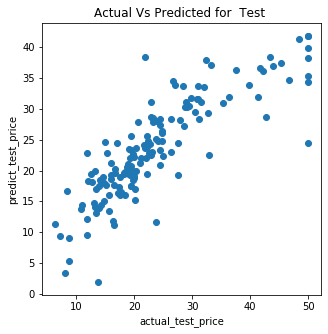

In [47]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,y_test_pred)
plt.title('Actual Vs Predicted for  Test ')
plt.xlabel('actual_test_price')
plt.ylabel('predict_test_price')

Text(0.5, 1.0, 'Residual frequencies for test')

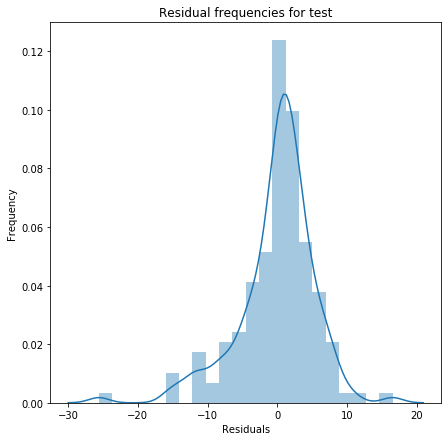

In [48]:
plt.figure(figsize=(7,7))
sns.distplot(y_test_pred-y_test)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual frequencies for test')